In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load the data
player_data = pd.read_csv('./data/players.csv')
salary_data = pd.read_csv('./data/salaries_1985to2018.csv')

In [166]:
combined_data = pd.merge(player_data, salary_data, left_on='_id', right_on='player_id')

combined_data.head()

,index_x,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,shoots,weight,index_y,league,player_id,salary,season,season_end,season_start,team
0,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [167]:
combined_data["is_power_forward"] = combined_data["position"].str.contains("Power Forward")
combined_data["is_small_forward"] = combined_data["position"].str.contains("Small Forward")
combined_data["is_shooting_guard"] = combined_data["position"].str.contains("Shooting Guard")
combined_data["is_center"] = combined_data["position"].str.contains("Center")
combined_data["is_point_guard"] = combined_data["position"].str.contains("Point Guard")

In [168]:
# Create dummy variables for team
team_dummies = pd.get_dummies(combined_data["team"])

# Combine the data
combined_data = pd.concat([combined_data, team_dummies], axis=1)
combined_data.head()

,index_x,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Seattle SuperSonics,Toronto Raptors,Utah Jazz,Vancouver Grizzlies,Washington Bullets,Washington Wizards
0,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,True,False,False,False,False,False,False,False,False
1,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,True,False,False,False,False,False,False,False,False
2,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,False,False,False,False,False,False,False,False,False
3,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,False,False,False,False,False,False,False,False,False
4,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,False,False,True,False,False,False,False,False,False,False


In [169]:
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')

In [170]:
# Refined data with feature engineering
refined_data = combined_data[['salary', 'season_end', 'is_power_forward', 'is_small_forward',
         'is_shooting_guard', 'is_center', 'is_point_guard', 'career_AST', 'career_FG%',
         'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
         'career_TRB', 'career_WS', 'career_eFG%'] + list(team_dummies.columns)]


refined_data = refined_data.dropna()

refined_data.head()

,salary,season_end,is_power_forward,is_small_forward,is_shooting_guard,is_center,is_point_guard,career_AST,career_FG%,career_FG3%,...,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Seattle SuperSonics,Toronto Raptors,Utah Jazz,Vancouver Grizzlies,Washington Bullets,Washington Wizards
0,395000,1991,True,False,False,False,False,0.3,50.2,0.0,...,False,True,False,False,False,False,False,False,False,False
1,494000,1992,True,False,False,False,False,0.3,50.2,0.0,...,False,True,False,False,False,False,False,False,False,False
2,500000,1993,True,False,False,False,False,0.3,50.2,0.0,...,False,False,False,False,False,False,False,False,False,False
3,805000,1994,True,False,False,False,False,0.3,50.2,0.0,...,False,False,False,False,False,False,False,False,False,False
4,650000,1995,True,False,False,False,False,0.3,50.2,0.0,...,False,False,True,False,False,False,False,False,False,False


In [171]:
X = refined_data.drop(columns=['salary'])  # Features
y = refined_data['salary']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
# Ridge Regression
ridge = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Ridge Regression RMSE: {rmse:.2f}')

Ridge Regression RMSE: 3106821.39


In [174]:
# Grid Search CV for alpha for Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

alphas = {'alpha': np.logspace(-3, 3, 10)}  
ridge_cv = GridSearchCV(Ridge(), param_grid=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

best_alpha = ridge_cv.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

y_pred = ridge_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Ridge Regression RMSE: {rmse:.2f}')
print(f'Ridge Regression R²: {r2:.4f}')

Best alpha: 215.44346900318823
Ridge Regression RMSE: 3101382.92
Ridge Regression R²: 0.4491


In [60]:
player_data.dropna(inplace = True)
player_data = player_data.drop(columns = 'index')
player_data.describe()

,career_AST,career_G,career_PTS
count,2360.000000,2360.000000,2360.000000
mean,1.670805,371.894492,7.529364
std,1.524798,336.238378,5.035131
min,0.000000,1.000000,0.000000
25%,0.600000,74.750000,3.500000
50%,1.200000,272.000000,6.400000
75%,2.200000,620.500000,10.300000
max,11.200000,1611.000000,30.100000


In [100]:
player_data['draft_year'] = player_data['draft_year'].astype(int)
player_data = player_data[player_data['draft_year']>= 2000]
player_data['draft_year'].min()

2000

In [101]:
salary_data = salary_data[salary_data['season_start']>= 2000]
salary_data['season_start'].min()

2000

In [107]:
salary_data.dropna(inplace = True)
player_data.dropna(inplace = True)
#salary_data = salary_data.drop(columns = 'index')
player_data.head()

,player_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
10,ackeral01,"January 21, 1983","Compton, California",0.5,37.0,32.0,50.0,30,8.5,2.7,...,60th overall,2nd round,Detroit Pistons,2005,6-5,"Eisenhower in Rialto, California",Alex Acker,Shooting Guard,Right,185lb
14,acyqu01,"October 6, 1990","Tyler, Texas",0.6,44.4,35.0,75.9,337,11.2,4.9,...,37th overall,2nd round,Toronto Raptors,2012,6-7,"Mesquite Horn in Mesquite, Texas",Quincy Acy,Power Forward and Small Forward,Right,240lb
18,adamsha01,"June 20, 1984","Inglewood, California",0.2,53.4,0.0,64.3,73,11.8,2.5,...,54th overall,2nd round,New Jersey Nets,2006,6-4,"Westchester in Los Angeles, California",Hassan Adams,Shooting Guard,Right,220lb
20,adamsjo01,"July 8, 1994","Atlanta, Georgia",0.6,40.2,38.5,60.7,32,13.1,3.2,...,22nd overall,1st round,Memphis Grizzlies,2014,6-5,"Oak Hill Academy in Mouth of Wilson, Virginia",Jordan Adams,Shooting Guard,Right,209lb
22,adamsst01,"July 20, 1993","Rotorua, New Zealand",1.0,58.8,0.0,55.3,467,16.7,9.7,...,12th overall,1st round,Oklahoma City Thunder,2013,7-0,"Notre Dame Preparatory School in Fitchburg, Ma...",Steven Adams,Center,Right,265lb


In [127]:
# Merge Data
#player_data.rename(columns = {'_id':'player_id'}, inplace = True)
merged_data = pd.merge(player_data, salary_data, on = 'player_id', how = 'outer')

merged_data.columns

Index(['player_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'league', 'salary', 'season',
       'season_end', 'season_start', 'team'],
      dtype='object')

In [131]:
#Replace team names
merged_data['draft_team'] = merged_data['draft_team'].replace({
    'Seattle SuperSonics': 'Oklahoma City Thunder', 
    'Charlotte Hornets': 'New Orleans Hornets', 
    'New Orleans/Oklahoma City Hornets': 'New Orleans Hornets', 
    'New Jersey Nets': 'Brooklyn Nets'
    })

merged_data['team'] = merged_data['team'].replace({
    'Seattle SuperSonics': 'Oklahoma City Thunder', 
    'Charlotte Hornets': 'New Orleans Hornets', 
    'New Orleans/Oklahoma City Hornets': 'New Orleans Hornets', 
    'New Jersey Nets': 'Brooklyn Nets'
    })

In [145]:
# Split data based on 
train_data = merged_data[(merged_data['season_start']>=2000) & (merged_data['season_end']<=2012)]
test_data = merged_data[merged_data['season_end']>2012]

In [146]:
# Export data
train_data.to_csv('data/train_data.csv', index=False)
test_data.to_csv('data/test_data.csv', index=False)

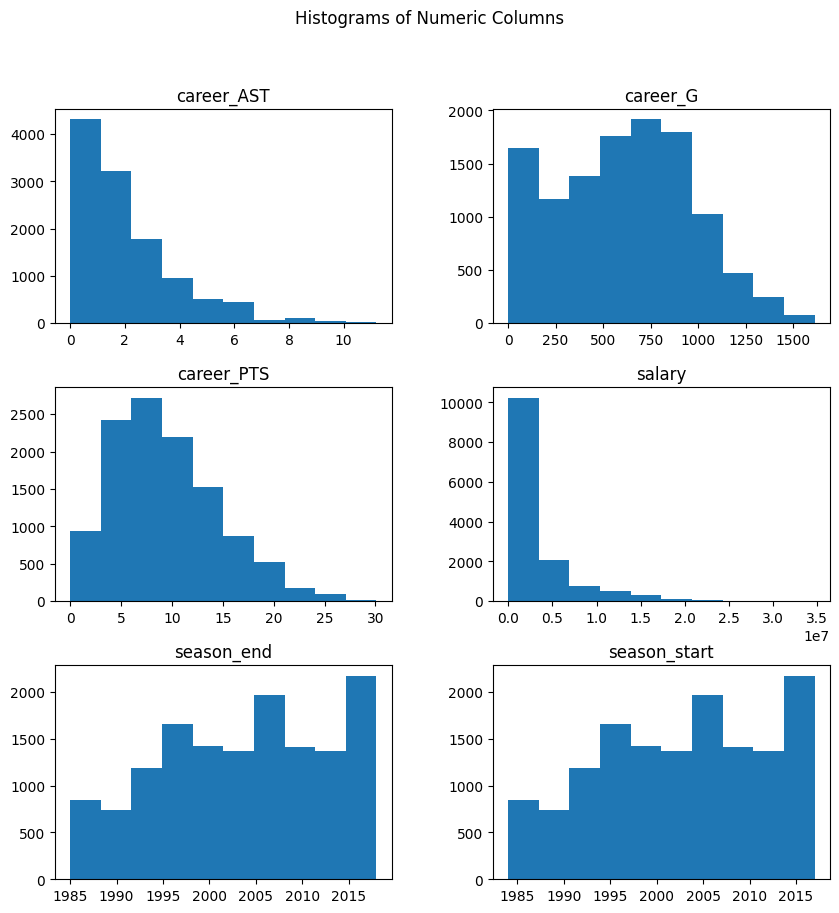

In [67]:
# Plot distributions of numerical features
numeric_data = merged_data.select_dtypes(include = ['number'])
numeric_data.hist(figsize=(10, 10), bins=10, grid=False)
plt.suptitle("Histograms of Numeric Columns")
plt.show()

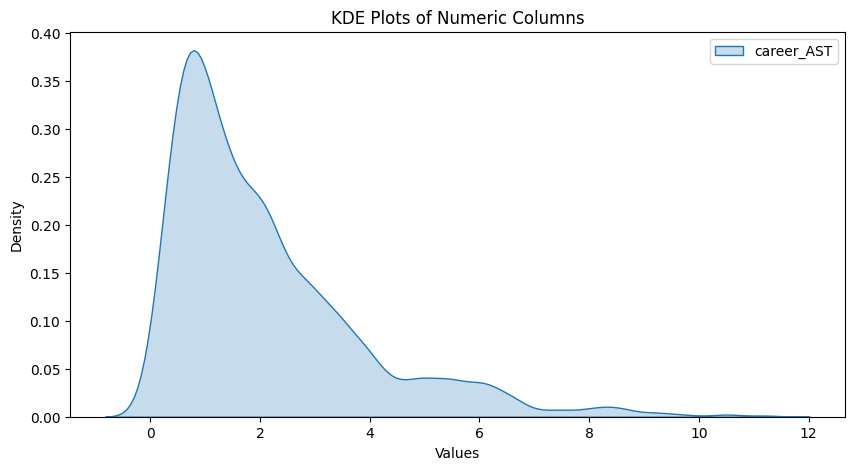

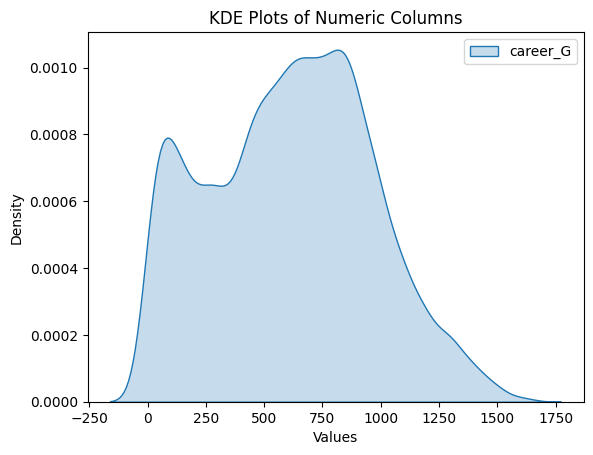

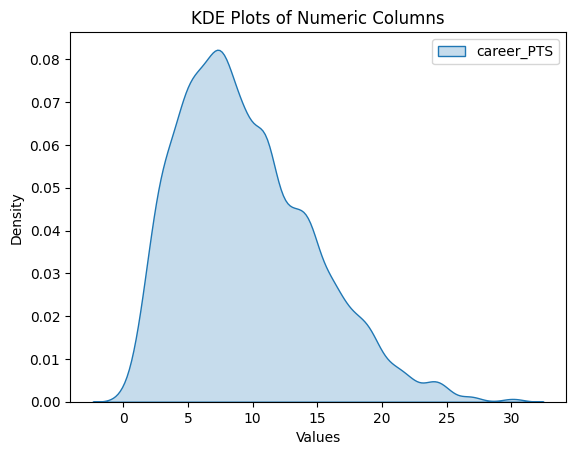

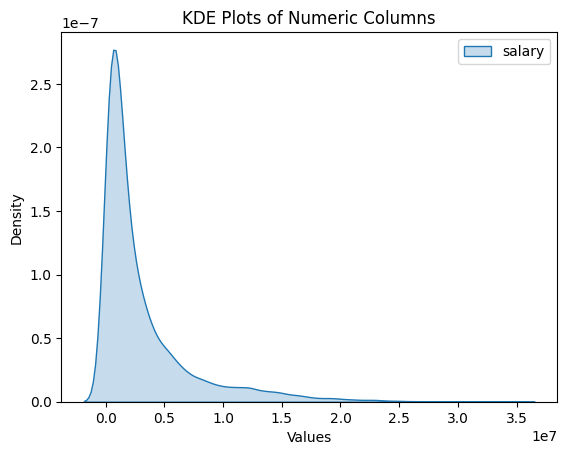

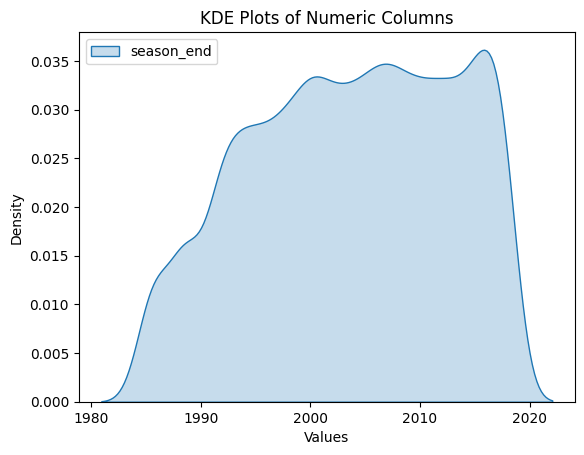

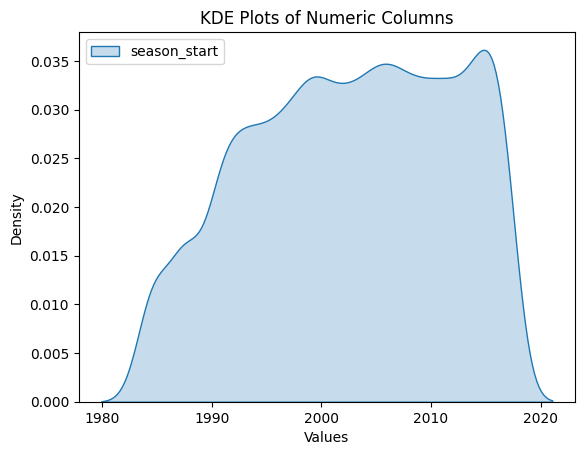

In [65]:
# KDE Plots
plt.figure(figsize=(10, 5))
for column in numeric_data.columns:
    sns.kdeplot(merged_data[column], label=column, fill=True)
    plt.title("KDE Plots of Numeric Columns")
    plt.xlabel("Values")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


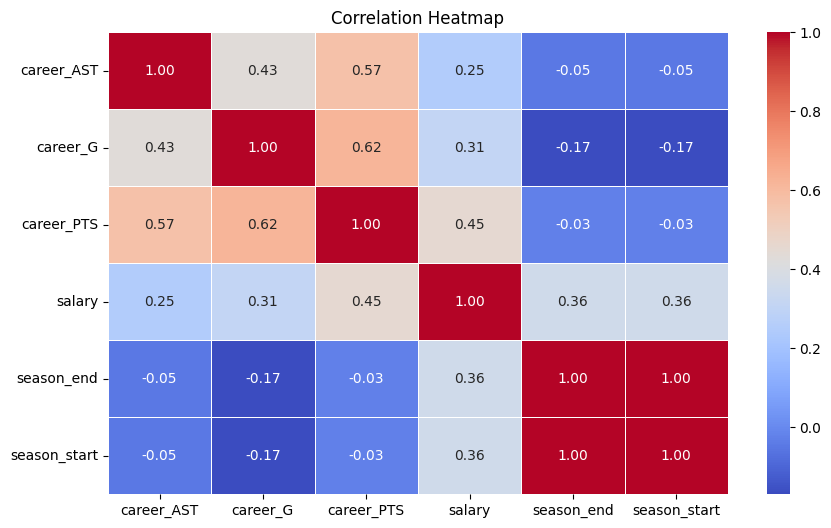

In [71]:
# Correlation Heatmap of variables
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

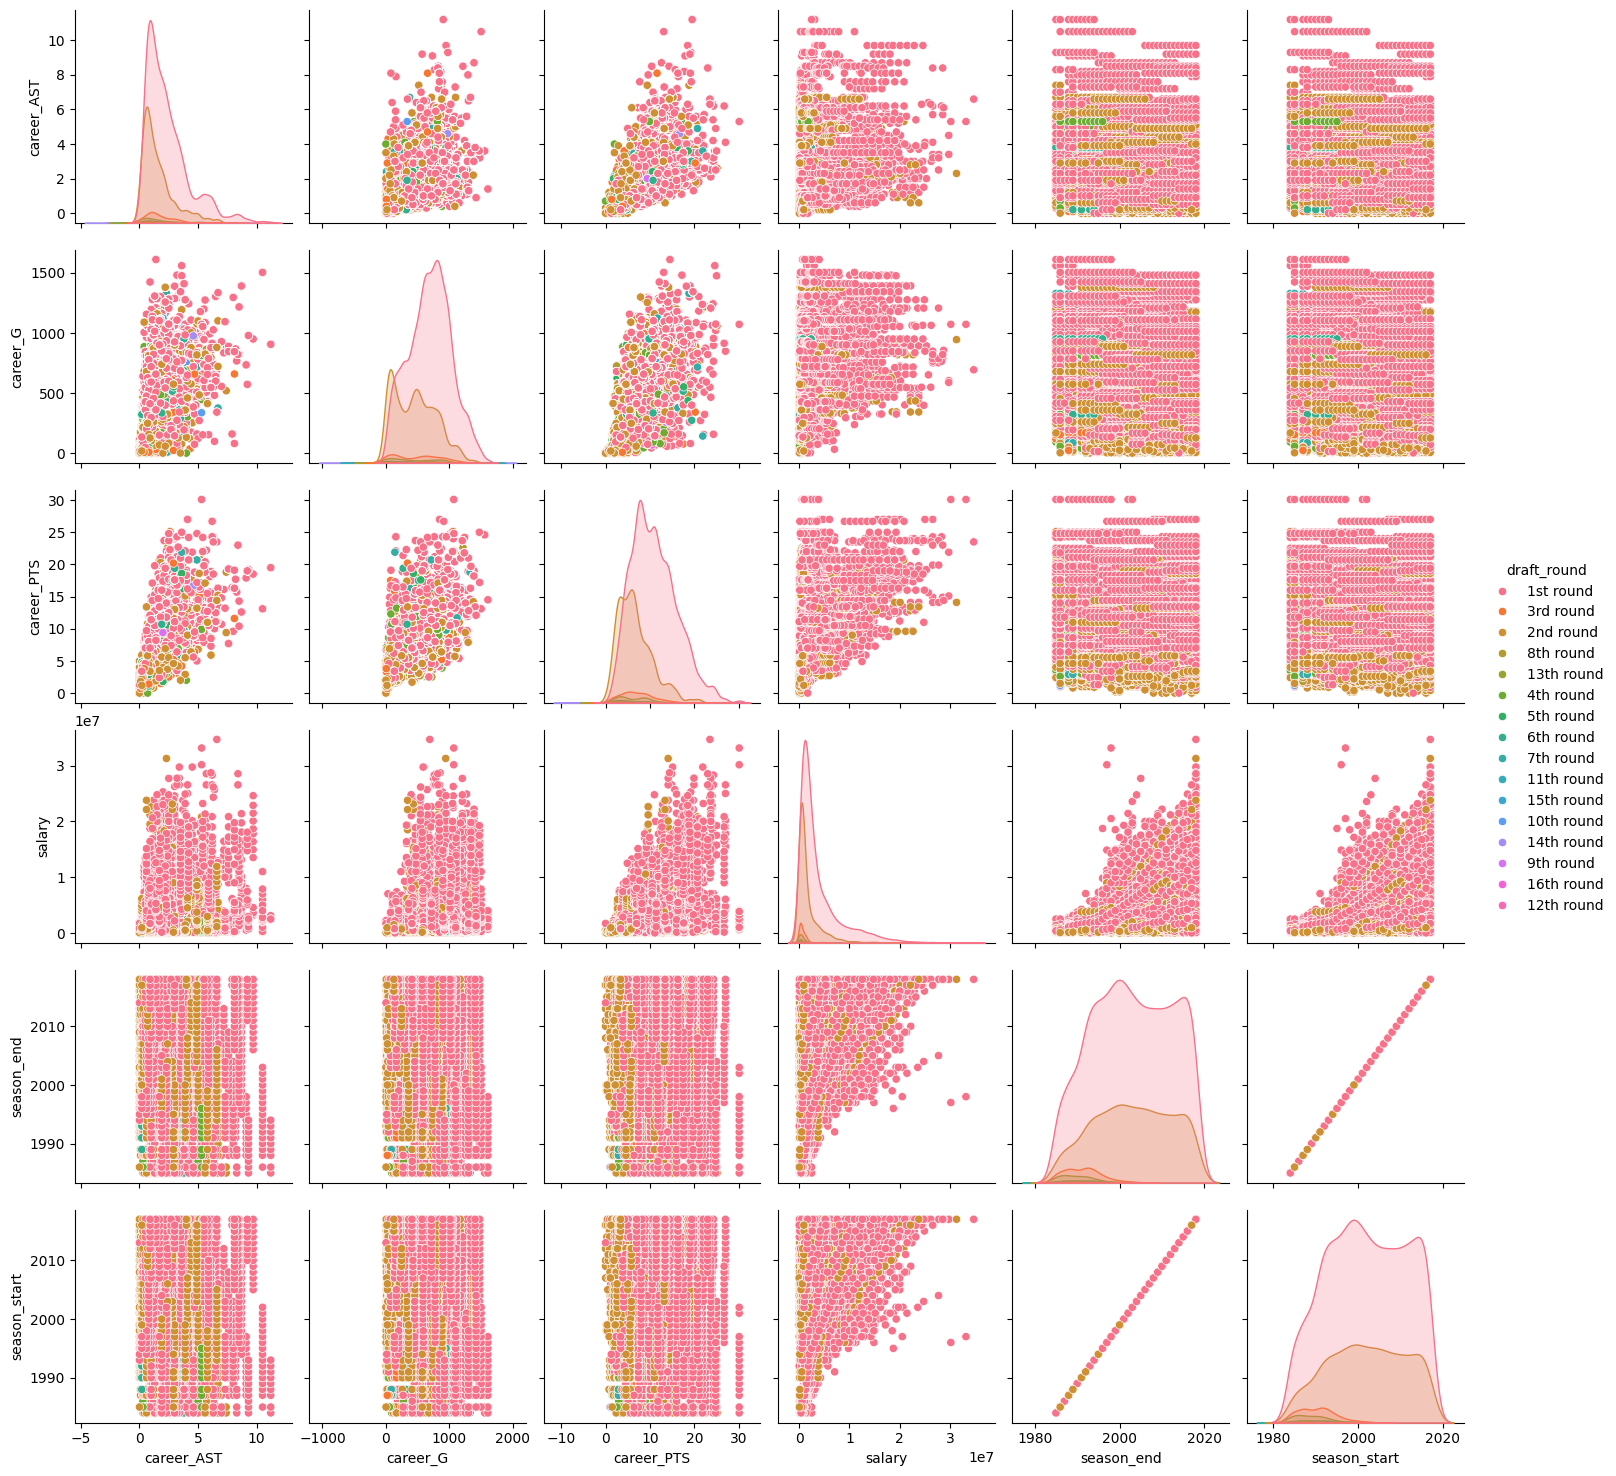

In [80]:
# Pairwise Plot
sns.pairplot(merged_data, hue="draft_round", diag_kind="kde") 
plt.show()